In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  
import pickle

In [2]:
import sklearn
print(sklearn.__version__)    


1.5.2


In [3]:
matches_df=pickle.load(open('match_data.pkl','rb'))
deliveries_df=pickle.load(open('ball_data.pkl','rb'))

In [4]:
df=matches_df.merge(deliveries_df,on='match_id')

In [5]:
df.head(65)

,match_id,team1,team2,venue,city,dates,winner,by_runs,by_wickets,player_of_match,...,batting_team,batter,non_striker,bowler,runs_batter,runs_extras,runs_total,extras_type,wicket_type,player_dismissed
0,1000887,Australia,Pakistan,"Brisbane Cricket Ground, Woolloongabba",Brisbane,[2017-01-13],Australia,92.0,NaN,[MS Wade],...,Australia,DA Warner,TM Head,Mohammad Amir,0,0,0,None,None,None
1,1000887,Australia,Pakistan,"Brisbane Cricket Ground, Woolloongabba",Brisbane,[2017-01-13],Australia,92.0,NaN,[MS Wade],...,Australia,DA Warner,TM Head,Mohammad Amir,0,0,0,None,None,None
2,1000887,Australia,Pakistan,"Brisbane Cricket Ground, Woolloongabba",Brisbane,[2017-01-13],Australia,92.0,NaN,[MS Wade],...,Australia,DA Warner,TM Head,Mohammad Amir,0,0,0,None,None,None
3,1000887,Australia,Pakistan,"Brisbane Cricket Ground, Woolloongabba",Brisbane,[2017-01-13],Australia,92.0,NaN,[MS Wade],...,Australia,DA Warner,TM Head,Mohammad Amir,0,0,0,None,None,None
4,1000887,Australia,Pakistan,"Brisbane Cricket Ground, Woolloongabba",Brisbane,[2017-01-13],Australia,92.0,NaN,[MS Wade],...,Australia,DA Warner,TM Head,Mohammad Amir,0,1,1,wides,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,1000887,Australia,Pakistan,"Brisbane Cricket Ground, Woolloongabba",Brisbane,[2017-01-13],Australia,92.0,NaN,[MS Wade],...,Australia,TM Head,MR Marsh,Hasan Ali,4,0,4,None,None,None
61,1000887,Australia,Pakistan,"Brisbane Cricket Ground, Woolloongabba",Brisbane,[2017-01-13],Australia,92.0,NaN,[MS Wade],...,Australia,TM Head,MR Marsh,Hasan Ali,0,0,0,None,None,None
62,1000887,Australia,Pakistan,"Brisbane Cricket Ground, Woolloongabba",Brisbane,[2017-01-13],Australia,92.0,NaN,[MS Wade],...,Australia,TM Head,MR Marsh,Hasan Ali,1,0,1,None,None,None
63,1000887,Australia,Pakistan,"Brisbane Cricket Ground, Woolloongabba",Brisbane,[2017-01-13],Australia,92.0,NaN,[MS Wade],...,Australia,TM Head,MR Marsh,Imad Wasim,1,0,1,None,None,None


In [6]:
df['innings']

0          1st innings
1          1st innings
2          1st innings
3          1st innings
4          1st innings
              ...     
1327861    2nd innings
1327862    2nd innings
1327863    2nd innings
1327864    2nd innings
1327865    2nd innings
Name: innings, Length: 1327866, dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1327866 entries, 0 to 1327865
Data columns (total 22 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   match_id          1327866 non-null  object 
 1   team1             1327866 non-null  object 
 2   team2             1327866 non-null  object 
 3   venue             1327866 non-null  object 
 4   city              1177211 non-null  object 
 5   dates             1327866 non-null  object 
 6   winner            1290573 non-null  object 
 7   by_runs           651283 non-null   float64
 8   by_wickets        639290 non-null   float64
 9   player_of_match   1282328 non-null  object 
 10  innings           1327866 non-null  object 
 11  ball              1327866 non-null  float64
 12  batting_team      1327866 non-null  object 
 13  batter            1327866 non-null  object 
 14  non_striker       1327866 non-null  object 
 15  bowler            1327866 non-null  object 
 16  

In [8]:
df['player_dismissed'] = df['player_dismissed'].apply(lambda x: 0 if x == None else 1)

In [9]:
## making wickets left using player_dismissed column
df['player_dismissed'] = df['player_dismissed'].astype('int')
df

,match_id,team1,team2,venue,city,dates,winner,by_runs,by_wickets,player_of_match,...,batting_team,batter,non_striker,bowler,runs_batter,runs_extras,runs_total,extras_type,wicket_type,player_dismissed
0,1000887,Australia,Pakistan,"Brisbane Cricket Ground, Woolloongabba",Brisbane,[2017-01-13],Australia,92.0,NaN,[MS Wade],...,Australia,DA Warner,TM Head,Mohammad Amir,0,0,0,None,None,0
1,1000887,Australia,Pakistan,"Brisbane Cricket Ground, Woolloongabba",Brisbane,[2017-01-13],Australia,92.0,NaN,[MS Wade],...,Australia,DA Warner,TM Head,Mohammad Amir,0,0,0,None,None,0
2,1000887,Australia,Pakistan,"Brisbane Cricket Ground, Woolloongabba",Brisbane,[2017-01-13],Australia,92.0,NaN,[MS Wade],...,Australia,DA Warner,TM Head,Mohammad Amir,0,0,0,None,None,0
3,1000887,Australia,Pakistan,"Brisbane Cricket Ground, Woolloongabba",Brisbane,[2017-01-13],Australia,92.0,NaN,[MS Wade],...,Australia,DA Warner,TM Head,Mohammad Amir,0,0,0,None,None,0
4,1000887,Australia,Pakistan,"Brisbane Cricket Ground, Woolloongabba",Brisbane,[2017-01-13],Australia,92.0,NaN,[MS Wade],...,Australia,DA Warner,TM Head,Mohammad Amir,0,1,1,wides,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327861,997995,Scotland,United Arab Emirates,"Grange Cricket Club Ground, Raeburn Place",Edinburgh,[2016-08-16],Scotland,NaN,7.0,None,...,Scotland,PL Mommsen,RD Berrington,Mohammad Shahzad (2),0,0,0,None,None,0
1327862,997995,Scotland,United Arab Emirates,"Grange Cricket Club Ground, Raeburn Place",Edinburgh,[2016-08-16],Scotland,NaN,7.0,None,...,Scotland,RD Berrington,PL Mommsen,Rohan Mustafa,0,0,0,None,None,0
1327863,997995,Scotland,United Arab Emirates,"Grange Cricket Club Ground, Raeburn Place",Edinburgh,[2016-08-16],Scotland,NaN,7.0,None,...,Scotland,RD Berrington,PL Mommsen,Rohan Mustafa,0,0,0,None,None,0
1327864,997995,Scotland,United Arab Emirates,"Grange Cricket Club Ground, Raeburn Place",Edinburgh,[2016-08-16],Scotland,NaN,7.0,None,...,Scotland,RD Berrington,PL Mommsen,Rohan Mustafa,0,0,0,None,None,0


In [10]:
## Creating a current score column by doing cumulative sum in runs column
# Convert 'runs' column to numeric dtype
df['runs_total'] = pd.to_numeric(df['runs_total'], errors='coerce')

df['current_score'] = df.groupby('match_id')['runs_total'].cumsum()

In [11]:
df['over'] = df['ball'].apply(lambda x:str(x).split(".")[0])
df['ball_no'] = df['ball'].apply(lambda x:str(x).split(".")[1])


In [12]:
df['balls_bowled'] = (df['over'].astype('int')*6) + df['ball_no'].astype('int')

In [13]:
df['balls_left'] = 300 - df['balls_bowled']
df['balls_left'] = df['balls_left'].apply(lambda x:0 if x<0 else x)

In [14]:
wickets_fallen = df.groupby(['match_id','innings'])['player_dismissed'].cumsum()

df['wickets_left'] = 10 - wickets_fallen

print(df['wickets_left'].unique())

[10  9  8  7  6  5  4  3  2  1  0 -1]


In [15]:
df.head(50)

,match_id,team1,team2,venue,city,dates,winner,by_runs,by_wickets,player_of_match,...,runs_total,extras_type,wicket_type,player_dismissed,current_score,over,ball_no,balls_bowled,balls_left,wickets_left
0,1000887,Australia,Pakistan,"Brisbane Cricket Ground, Woolloongabba",Brisbane,[2017-01-13],Australia,92.0,NaN,[MS Wade],...,0,None,None,0,0,0,1,1,299,10
1,1000887,Australia,Pakistan,"Brisbane Cricket Ground, Woolloongabba",Brisbane,[2017-01-13],Australia,92.0,NaN,[MS Wade],...,0,None,None,0,0,0,2,2,298,10
2,1000887,Australia,Pakistan,"Brisbane Cricket Ground, Woolloongabba",Brisbane,[2017-01-13],Australia,92.0,NaN,[MS Wade],...,0,None,None,0,0,0,3,3,297,10
3,1000887,Australia,Pakistan,"Brisbane Cricket Ground, Woolloongabba",Brisbane,[2017-01-13],Australia,92.0,NaN,[MS Wade],...,0,None,None,0,0,0,4,4,296,10
4,1000887,Australia,Pakistan,"Brisbane Cricket Ground, Woolloongabba",Brisbane,[2017-01-13],Australia,92.0,NaN,[MS Wade],...,1,wides,None,0,1,0,5,5,295,10
5,1000887,Australia,Pakistan,"Brisbane Cricket Ground, Woolloongabba",Brisbane,[2017-01-13],Australia,92.0,NaN,[MS Wade],...,0,None,None,0,1,0,6,6,294,10
6,1000887,Australia,Pakistan,"Brisbane Cricket Ground, Woolloongabba",Brisbane,[2017-01-13],Australia,92.0,NaN,[MS Wade],...,0,None,None,0,1,0,7,7,293,10
7,1000887,Australia,Pakistan,"Brisbane Cricket Ground, Woolloongabba",Brisbane,[2017-01-13],Australia,92.0,NaN,[MS Wade],...,0,None,None,0,1,1,1,7,293,10
8,1000887,Australia,Pakistan,"Brisbane Cricket Ground, Woolloongabba",Brisbane,[2017-01-13],Australia,92.0,NaN,[MS Wade],...,1,None,None,0,2,1,2,8,292,10
9,1000887,Australia,Pakistan,"Brisbane Cricket Ground, Woolloongabba",Brisbane,[2017-01-13],Australia,92.0,NaN,[MS Wade],...,0,None,None,0,2,1,3,9,291,10


In [16]:
df['wickets_left'].sample(20)

614681      6
185231      7
484062      6
922287      7
470315      7
627018      6
1212894     4
1207858     6
25939      10
1199335     7
300122      6
1206797     7
1296873    10
606559      1
942885      9
969194      7
1177371     6
738286      2
445669      7
1121856    10
Name: wickets_left, dtype: int64

In [17]:
df['crr'] = (df['current_score']*6)/df['balls_bowled']

In [18]:

df['runs_total'] = pd.to_numeric(df['runs_total'], errors='coerce')

groups = df.groupby(['match_id','innings'])

last_five = []
for group_id, group_data in groups:
    rolling_sum = group_data['runs_total'].rolling(window=60, min_periods=1).sum()

    if len(group_data) < 30:
        rolling_sum.iloc[-1] = np.nan
    last_five.extend(rolling_sum.values.tolist())

df['last_ten_runs'] = last_five

In [19]:
groups = df.groupby(['match_id', 'innings'])

last_five_wickets = []
for group_id, group_data in groups:

    rolling_wickets = group_data['player_dismissed'].rolling(window=60, min_periods=1).sum()
    
    last_five_wickets.extend(rolling_wickets.values.tolist())

df['last_ten_wickets'] = last_five_wickets

print("Success: 'last_five_wickets' column added.")

Success: 'last_five_wickets' column added.


In [20]:
innings_map = {'1st innings': 1, '2nd innings': 2}
df['innings'] = df['innings'].map(innings_map)

df = df[df['innings'] == 1]

total_score_df = df.groupby('match_id')['runs_total'].sum().reset_index()
total_score_df.rename(columns={'runs_total': 'final_score'}, inplace=True)

df = df.merge(total_score_df, on='match_id')

In [21]:
df

,match_id,team1,team2,venue,city,dates,winner,by_runs,by_wickets,player_of_match,...,current_score,over,ball_no,balls_bowled,balls_left,wickets_left,crr,last_ten_runs,last_ten_wickets,final_score
0,1000887,Australia,Pakistan,"Brisbane Cricket Ground, Woolloongabba",Brisbane,[2017-01-13],Australia,92.0,NaN,[MS Wade],...,0,0,1,1,299,10,0.000000,0.0,0.0,268
1,1000887,Australia,Pakistan,"Brisbane Cricket Ground, Woolloongabba",Brisbane,[2017-01-13],Australia,92.0,NaN,[MS Wade],...,0,0,2,2,298,10,0.000000,0.0,0.0,268
2,1000887,Australia,Pakistan,"Brisbane Cricket Ground, Woolloongabba",Brisbane,[2017-01-13],Australia,92.0,NaN,[MS Wade],...,0,0,3,3,297,10,0.000000,0.0,0.0,268
3,1000887,Australia,Pakistan,"Brisbane Cricket Ground, Woolloongabba",Brisbane,[2017-01-13],Australia,92.0,NaN,[MS Wade],...,0,0,4,4,296,10,0.000000,0.0,0.0,268
4,1000887,Australia,Pakistan,"Brisbane Cricket Ground, Woolloongabba",Brisbane,[2017-01-13],Australia,92.0,NaN,[MS Wade],...,1,0,5,5,295,10,1.200000,1.0,0.0,268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721699,997995,Scotland,United Arab Emirates,"Grange Cricket Club Ground, Raeburn Place",Edinburgh,[2016-08-16],Scotland,NaN,7.0,None,...,227,44,6,270,30,1,5.044444,36.0,3.0,228
721700,997995,Scotland,United Arab Emirates,"Grange Cricket Club Ground, Raeburn Place",Edinburgh,[2016-08-16],Scotland,NaN,7.0,None,...,228,45,1,271,29,1,5.047970,36.0,3.0,228
721701,997995,Scotland,United Arab Emirates,"Grange Cricket Club Ground, Raeburn Place",Edinburgh,[2016-08-16],Scotland,NaN,7.0,None,...,228,45,2,272,28,1,5.029412,35.0,3.0,228
721702,997995,Scotland,United Arab Emirates,"Grange Cricket Club Ground, Raeburn Place",Edinburgh,[2016-08-16],Scotland,NaN,7.0,None,...,228,45,3,273,27,1,5.010989,31.0,3.0,228


In [22]:
teams= [
    "India", "Sri Lanka", "Afghanistan", "Australia", 
    "Bangladesh", "England", "South Africa", 
    "West Indies", "New Zealand", "Pakistan", 
     "Netherlands", "Namibia", 
    "Zimbabwe"
]

In [23]:
df = df[df['team1'].isin(teams)]
df = df[df['team2'].isin(teams)]


In [24]:
df

,match_id,team1,team2,venue,city,dates,winner,by_runs,by_wickets,player_of_match,...,current_score,over,ball_no,balls_bowled,balls_left,wickets_left,crr,last_ten_runs,last_ten_wickets,final_score
0,1000887,Australia,Pakistan,"Brisbane Cricket Ground, Woolloongabba",Brisbane,[2017-01-13],Australia,92.0,NaN,[MS Wade],...,0,0,1,1,299,10,0.000000,0.0,0.0,268
1,1000887,Australia,Pakistan,"Brisbane Cricket Ground, Woolloongabba",Brisbane,[2017-01-13],Australia,92.0,NaN,[MS Wade],...,0,0,2,2,298,10,0.000000,0.0,0.0,268
2,1000887,Australia,Pakistan,"Brisbane Cricket Ground, Woolloongabba",Brisbane,[2017-01-13],Australia,92.0,NaN,[MS Wade],...,0,0,3,3,297,10,0.000000,0.0,0.0,268
3,1000887,Australia,Pakistan,"Brisbane Cricket Ground, Woolloongabba",Brisbane,[2017-01-13],Australia,92.0,NaN,[MS Wade],...,0,0,4,4,296,10,0.000000,0.0,0.0,268
4,1000887,Australia,Pakistan,"Brisbane Cricket Ground, Woolloongabba",Brisbane,[2017-01-13],Australia,92.0,NaN,[MS Wade],...,1,0,5,5,295,10,1.200000,1.0,0.0,268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721109,995465,Sri Lanka,Australia,Pallekele International Cricket Stadium,None,[2016-09-04],Australia,NaN,5.0,[DA Warner],...,194,39,5,239,61,1,4.870293,53.0,4.0,195
721110,995465,Sri Lanka,Australia,Pallekele International Cricket Stadium,None,[2016-09-04],Australia,NaN,5.0,[DA Warner],...,194,39,6,240,60,1,4.850000,49.0,4.0,195
721111,995465,Sri Lanka,Australia,Pallekele International Cricket Stadium,None,[2016-09-04],Australia,NaN,5.0,[DA Warner],...,195,39,7,241,59,1,4.854772,50.0,4.0,195
721112,995465,Sri Lanka,Australia,Pallekele International Cricket Stadium,None,[2016-09-04],Australia,NaN,5.0,[DA Warner],...,195,40,1,241,59,1,4.854772,50.0,4.0,195


In [25]:
cities = np.where(df['city'].isnull(),df['venue'].str.split().apply(lambda x:x[0]),df['city'])

In [26]:
df['city'] = cities

In [27]:
city=sorted(df['city'].unique().tolist())

In [28]:
team=sorted(df['team1'].unique().tolist())


In [29]:
df['bowling_team'] = np.where(df['batting_team'] == df['team1'], df['team2'], df['team1'])

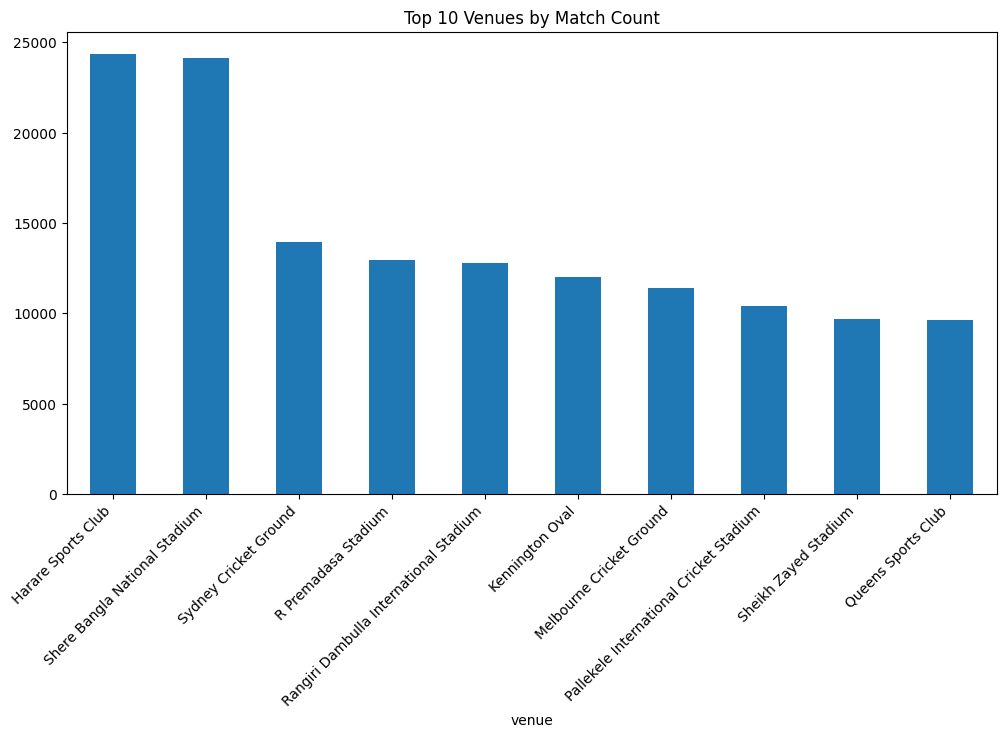

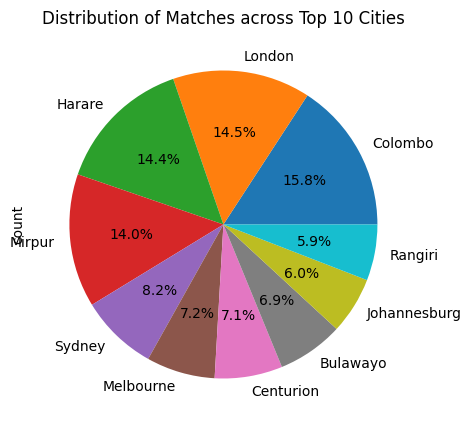

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
df['venue'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Venues by Match Count')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(10,5))
df['city'].value_counts().head(10).plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Matches across Top 10 Cities')
plt.show()

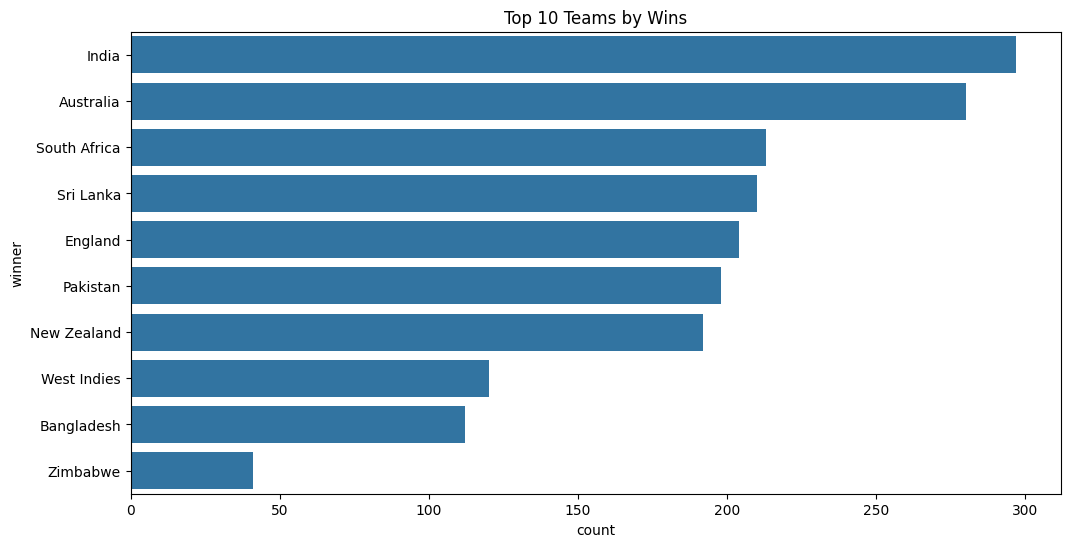

In [31]:
plt.figure(figsize=(12,6))
sns.countplot(data=df.drop_duplicates(subset=['match_id']), y='winner', 
              order=df.drop_duplicates(subset=['match_id'])['winner'].value_counts().index[:10])
plt.title('Top 10 Teams by Wins')
plt.show()

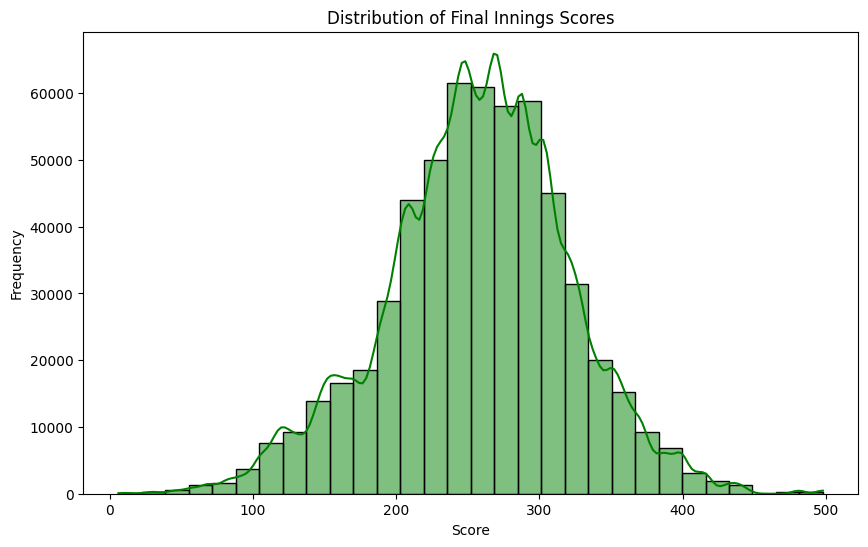

In [32]:
plt.figure(figsize=(10,6))
sns.histplot(df['final_score'], bins=30, kde=True, color='green')
plt.title('Distribution of Final Innings Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

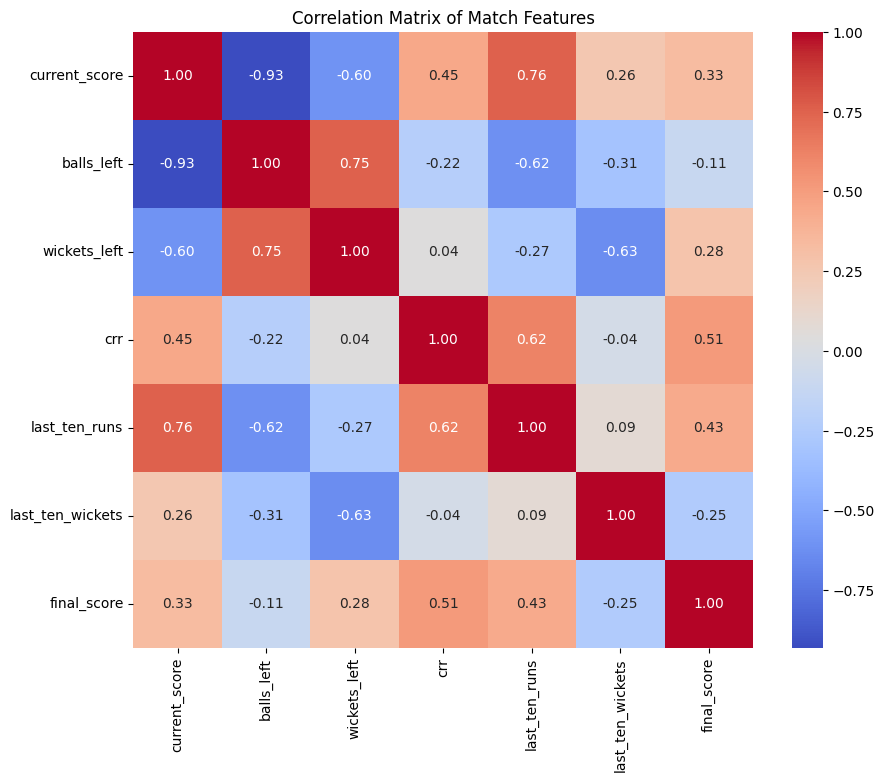

In [33]:
numeric_df = df[['current_score', 'balls_left', 'wickets_left', 'crr', 'last_ten_runs', 'last_ten_wickets', 'final_score']]
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Match Features')
plt.show()

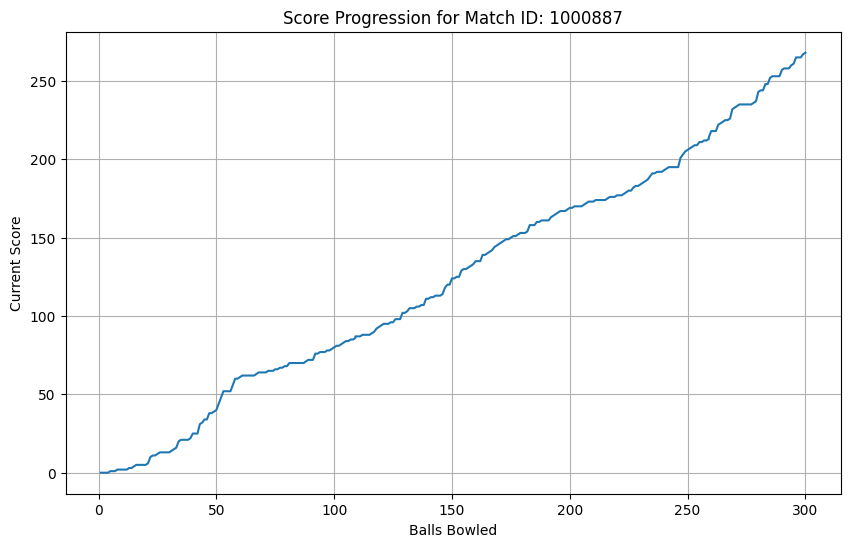

In [34]:
sample_match = df[df['match_id'] == df['match_id'].unique()[0]]
plt.figure(figsize=(10,6))
plt.plot(sample_match['balls_bowled'], sample_match['current_score'])
plt.title(f"Score Progression for Match ID: {sample_match['match_id'].iloc[0]}")
plt.xlabel('Balls Bowled')
plt.ylabel('Current Score')
plt.grid(True)
plt.show()

In [35]:
df=df[['batting_team','bowling_team','city','current_score','balls_left','wickets_left','crr','last_ten_runs','last_ten_wickets','final_score']]

In [36]:
df['city'].isnull().sum()

np.int64(0)

In [37]:
df.sample(5)

,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_ten_runs,last_ten_wickets,final_score
30715,India,West Indies,Antigua,74,180,8,3.700000,39.0,0.0,251
380035,Australia,India,Nagpur,236,45,5,5.552941,61.0,1.0,317
664109,Australia,Pakistan,Sharjah,145,118,7,4.780220,49.0,1.0,255
15742,India,New Zealand,Visakhapatnam,190,74,7,5.044248,54.0,1.0,269
91265,West Indies,Bangladesh,Dublin,232,25,4,5.061818,57.0,4.0,261


In [38]:

print("Dataframe Shape:", df.shape)
print("\nColumn-wise Missing Values:")
print(df.isnull().sum())

df.describe()

Dataframe Shape: (570471, 10)

Column-wise Missing Values:
batting_team        0
bowling_team        0
city                0
current_score       0
balls_left          0
wickets_left        0
crr                 0
last_ten_runs       5
last_ten_wickets    0
final_score         0
dtype: int64


,current_score,balls_left,wickets_left,crr,last_ten_runs,last_ten_wickets,final_score
count,570471.000000,570471.000000,570471.000000,570471.000000,570466.000000,570471.000000,570471.000000
mean,115.966033,155.675496,7.033993,4.635126,44.242253,1.194355,256.740732
std,78.854118,85.198608,2.298146,1.427601,19.969342,1.129579,64.274450
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,51.000000,83.000000,6.000000,3.843750,33.000000,0.000000,218.000000
50%,106.000000,158.000000,7.000000,4.642534,44.000000,1.000000,259.000000
75%,170.000000,229.000000,9.000000,5.426087,56.000000,2.000000,299.000000
max,498.000000,299.000000,10.000000,96.000000,181.000000,9.000000,498.000000


In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error,root_mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd

# Drop NaNs created by the 5-over rolling window
df.dropna(inplace=True)

X = df[['batting_team', 'bowling_team', 'city', 'current_score', 'balls_left', 'wickets_left', 'crr', 'last_ten_runs', 'last_ten_wickets']]
y = df['final_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the transformer for categorical columns
trf = ColumnTransformer([
    ('trf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), ['batting_team', 'bowling_team', 'city']),
    ('num', 'passthrough', ['current_score', 'balls_left', 'wickets_left', 'crr', 'last_ten_runs', 'last_ten_wickets'])
], remainder='passthrough')

C:\Users\Pulkit\AppData\Local\Temp\ipykernel_17192\3950489216.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [40]:
from sklearn.linear_model import LinearRegression

lr_pipe = Pipeline(steps=[
    ('step1', trf),
    ('step2', LinearRegression())
])

lr_pipe.fit(X_train, y_train)
y_pred = lr_pipe.predict(X_test)

print("Linear Regression - R2 Score:", r2_score(y_test, y_pred))
print("Linear Regression - MAE:", mean_absolute_error(y_test, y_pred))
print("Linear regression-Rmse",root_mean_squared_error(y_test,y_pred))

Linear Regression - R2 Score: 0.5671554936174653
Linear Regression - MAE: 31.292011218178622
Linear regression-Rmse 42.31288125013132


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003328 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1231
[LightGBM] [Info] Number of data points in the train set: 456372, number of used features: 158
[LightGBM] [Info] Start training from score 256.690268
LightGBM - R2 Score: 0.9640418492658374
LightGBM - MAE: 5.854279318182743
LightGBM - RMSE: 12.19566028818294


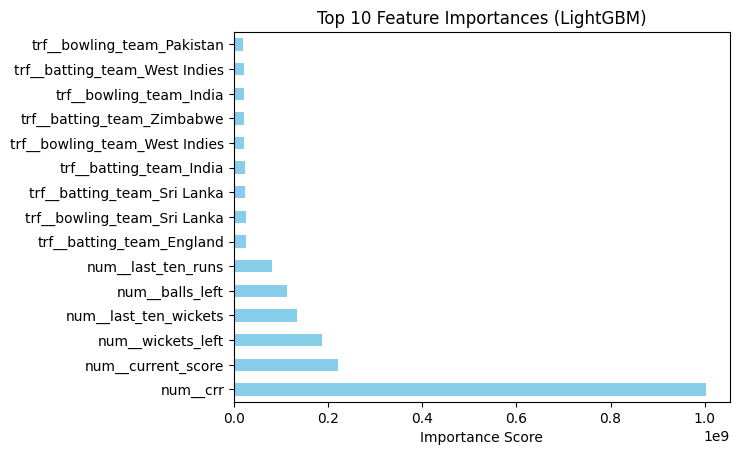

In [41]:
from lightgbm import LGBMRegressor

# Create the LightGBM Pipeline
lgbm_pipe = Pipeline(steps=[
    ('step1', trf),
    ('step2', LGBMRegressor(
        n_estimators=3000,        # More trees for finer detail
        learning_rate=0.5,      # Smaller steps for higher accuracy
        num_leaves=64,            # Complexity of individual trees
        max_depth=12,             # Limits tree depth to prevent over-specialization
        min_child_samples=20,     # Minimum data points in a leaf (prevents overfitting)
        reg_alpha=0.1,            # L1 regularization (removes noise)
        reg_lambda=0.1,           # L2 regularization (smooths weights)
        subsample=0.8,            # Use 80% of data for each tree (Bagging)
        colsample_bytree=0.8,     # Use 80% of features for each tree
        random_state=42,
        importance_type='gain',
        n_jobs=-1  # Measures feature contribution to the model
    ))
])

# Training
lgbm_pipe.fit(X_train, y_train)

# Prediction
y_pred = lgbm_pipe.predict(X_test)

# Evaluation
print("LightGBM - R2 Score:", r2_score(y_test, y_pred))
print("LightGBM - MAE:", mean_absolute_error(y_test, y_pred))
print("LightGBM - RMSE:", root_mean_squared_error(y_test, y_pred))

# Feature Importance Graph
# Extracting feature names from the transformer
feature_names = lgbm_pipe.named_steps['step1'].get_feature_names_out()
importances = lgbm_pipe.named_steps['step2'].feature_importances_

feat_importances = pd.Series(importances, index=feature_names)
feat_importances.nlargest(15).plot(kind='barh', color='skyblue')
plt.title("Top 10 Feature Importances (LightGBM)")
plt.xlabel("Importance Score")
plt.show()

Tuned XGBoost - R2: 0.9541917443275452
Tuned XGBoost - MAE: 7.613699550162416
Tuned XGboost-RMSE: 13.765070710276815


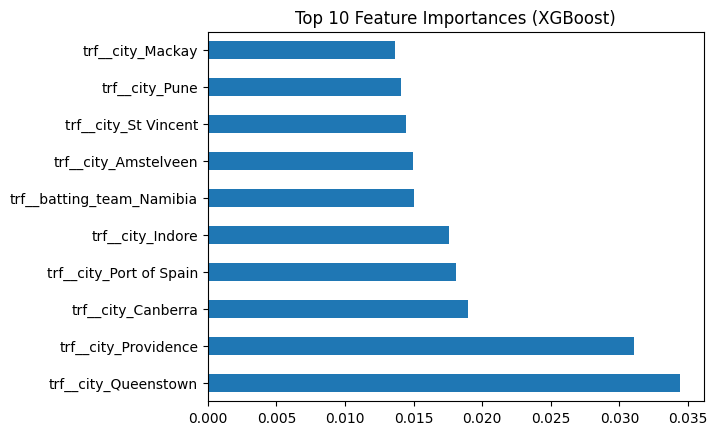

In [42]:
from xgboost import XGBRegressor
xgb_pipe = Pipeline(steps=[
    ('step1', trf),
    ('step2', XGBRegressor(
        n_estimators=2000,
        learning_rate=0.05,
        max_depth=10,
        subsample=0.8,
        colsample_bytree=0.8,
        gamma=1,
        reg_alpha=10, # L1 regularization
        n_jobs=-1,
        random_state=42,
        reg_lambda=1
    ))
])

xgb_pipe.fit(X_train, y_train)
y_pred = xgb_pipe.predict(X_test)
print("Tuned XGBoost - R2:", r2_score(y_test, y_pred))
print("Tuned XGBoost - MAE:", mean_absolute_error(y_test, y_pred))
print("Tuned XGboost-RMSE:",root_mean_squared_error(y_test,y_pred))
# Feature Importance Graph
feat_importances = pd.Series(xgb_pipe.named_steps['step2'].feature_importances_, 
                             index=xgb_pipe.named_steps['step1'].get_feature_names_out())
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances (XGBoost)")
plt.show()

0:	learn: 50.7954162	total: 183ms	remaining: 6m 6s
100:	learn: 23.8066151	total: 8.02s	remaining: 2m 30s
200:	learn: 18.5831761	total: 15.5s	remaining: 2m 18s
300:	learn: 15.9459747	total: 22.7s	remaining: 2m 7s
400:	learn: 14.2771350	total: 29.9s	remaining: 1m 59s
500:	learn: 13.1165785	total: 36.7s	remaining: 1m 49s
600:	learn: 12.2644198	total: 43.7s	remaining: 1m 41s
700:	learn: 11.5935340	total: 58s	remaining: 1m 47s
800:	learn: 11.0337643	total: 1m 16s	remaining: 1m 53s
900:	learn: 10.5125885	total: 1m 33s	remaining: 1m 53s
1000:	learn: 10.0872319	total: 1m 51s	remaining: 1m 51s
1100:	learn: 9.7489735	total: 2m 8s	remaining: 1m 44s
1200:	learn: 9.4544138	total: 3m 5s	remaining: 2m 3s
1300:	learn: 9.1676593	total: 3m 28s	remaining: 1m 51s
1400:	learn: 8.9017837	total: 3m 37s	remaining: 1m 32s
1500:	learn: 8.6743650	total: 3m 46s	remaining: 1m 15s
1600:	learn: 8.4611805	total: 3m 53s	remaining: 58.2s
1700:	learn: 8.2785721	total: 4m 1s	remaining: 42.5s
1800:	learn: 8.1090563	total:

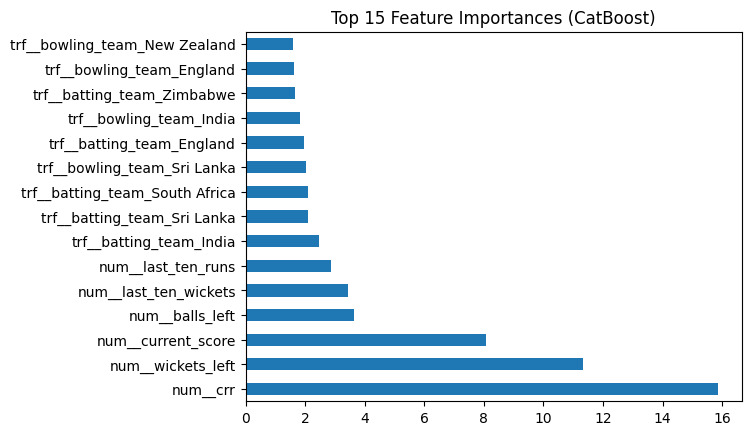

In [43]:
from catboost import CatBoostRegressor

cat_pipe = Pipeline(steps=[
    ('step1', trf),
    ('step2', CatBoostRegressor(
    iterations=2000,           # Increase from 800 to allow deeper learning
    learning_rate=0.5,        # Slightly lower for more precise optimization
    depth=12,                  # Increase from 6 to capture more complex patterns
    l2_leaf_reg=10,             # Regularization to prevent overfitting
    bagging_temperature=0.2,   # Adds randomness to improve generalization
    random_strength=1,         # Helps prevent overfitting on specific scores
    loss_function='RMSE',      # Standard for regression
    random_seed=42,            # Ensures results are reproducible
    verbose=100  ))
])

cat_pipe.fit(X_train, y_train)
y_pred = cat_pipe.predict(X_test)

print("CatBoost - R2 Score:", r2_score(y_test, y_pred))
print("CatBoost - MAE:", mean_absolute_error(y_test, y_pred))
print("CatBoost - RMSE:", root_mean_squared_error(y_test, y_pred))

feat_importances = pd.Series(cat_pipe.named_steps['step2'].get_feature_importance(), 
                             index=cat_pipe.named_steps['step1'].get_feature_names_out())
feat_importances.nlargest(15).plot(kind='barh')
plt.title("Top 15 Feature Importances (CatBoost)")
plt.show()

Tuned Gradient Boosting - R2: 0.8363872357701536
Tuned Gradient Boosting - MAE: 16.725599635051594
tuned gradient boosting: 26.014485151447165


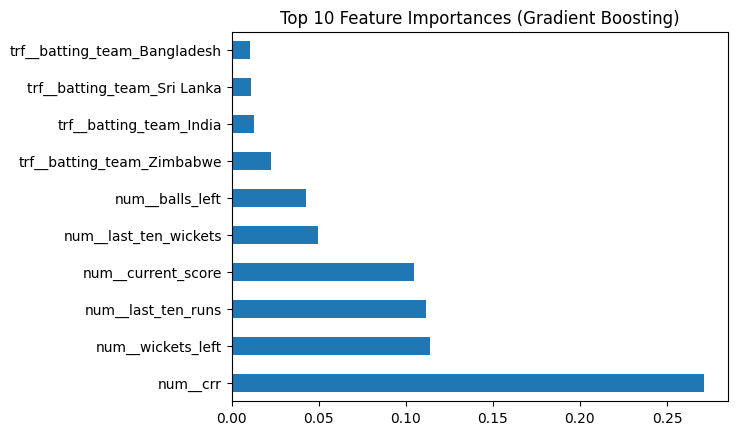

In [46]:
from sklearn.ensemble import GradientBoostingRegressor

gb_pipe = Pipeline(steps=[
    ('step1', trf),
    ('step2', GradientBoostingRegressor(
        n_estimators=2000,
        learning_rate=0.07,
        max_depth=6,
        subsample=0.7,
        loss='huber', # Great for cricket where scores can be extreme
        max_features='sqrt',
        random_state=42
    ))
])

gb_pipe.fit(X_train, y_train)
y_pred = gb_pipe.predict(X_test)
print("Tuned Gradient Boosting - R2:", r2_score(y_test, y_pred))
print("Tuned Gradient Boosting - MAE:", mean_absolute_error(y_test, y_pred))
print("tuned gradient boosting:",root_mean_squared_error(y_test,y_pred))
# Feature Importance Graph
feat_importances = pd.Series(gb_pipe.named_steps['step2'].feature_importances_, 
                             index=gb_pipe.named_steps['step1'].get_feature_names_out())
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances (Gradient Boosting)")
plt.show()

Tuned Random Forest - R2: 0.8024362828789398
Tuned Random Forest - MAE: 18.869305389136546
Tuned random forest-Rmse: 28.586450830143264


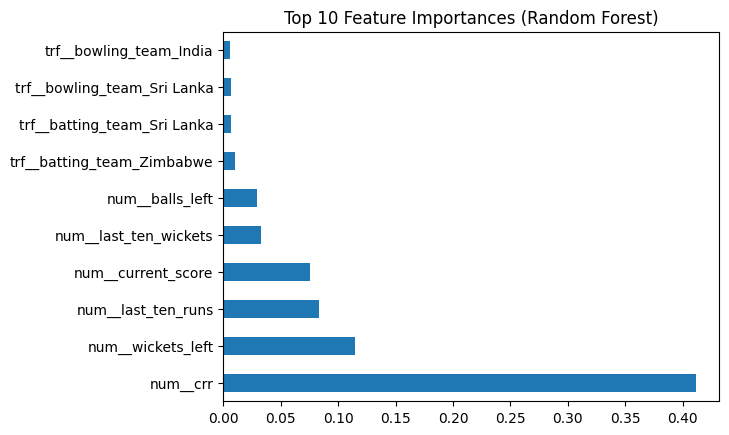

In [44]:
from sklearn.ensemble import RandomForestRegressor

# Hyperparameters: 
# n_estimators=200 for stability
# max_samples=0.8 to introduce randomness (Bootstrapping)
# max_features=0.6 to prevent one feature (like current_score) from dominating
rf_tuned = Pipeline(steps=[
    ('step1', trf),
    ('step2', RandomForestRegressor(
        n_estimators=2000,
        max_depth=20,
        max_samples=0.8,
        max_features=0.6,
        min_samples_split=5,
        bootstrap=True,
        n_jobs=-1,
        random_state=42
    ))
])

rf_tuned.fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)
print("Tuned Random Forest - R2:", r2_score(y_test, y_pred))
print("Tuned Random Forest - MAE:", mean_absolute_error(y_test, y_pred))
print("Tuned random forest-Rmse:",root_mean_squared_error(y_test,y_pred))
# Feature Importance Graph
feat_importances = pd.Series(rf_tuned.named_steps['step2'].feature_importances_, 
                             index=rf_tuned.named_steps['step1'].get_feature_names_out())
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()

In [47]:
import pickle

# Saving the 6 models
pickle.dump(lr_pipe, open('lr_model_odi_score.pkl', 'wb'))
pickle.dump(rf_tuned, open('rf_model_odi_score.pkl', 'wb'))
pickle.dump(gb_pipe, open('gb_model_odi_score.pkl', 'wb'))
pickle.dump(xgb_pipe, open('xgb_model_odi_score.pkl', 'wb'))
pickle.dump(cat_pipe, open('cat_model_odi_score.pkl', 'wb'))
pickle.dump(lgbm_pipe, open('lgbm_model_odi_score.pkl', 'wb'))

# Saving teams and cities for the dropdowns
pickle.dump(team, open('teams_odi_score.pkl', 'wb'))
pickle.dump(city, open('cities_odi_score.pkl', 'wb'))